# PDS Coded Project

#**Description**#

**Context**
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

**Objective**
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

**Data Description**

  * **Age:**The age of the individual in years.

  * **Gender:** The gender of the individual, categorized as male or female.

  * **Profession:** The occupation or profession of the individual.

  * **Marital_status:** The marital status of the individual, such as married &, single

  * **Education:** The educational qualification of the individual Graduate and Post Graduate

  * **No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially.

  * **Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

  * **House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

  * **Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No"

  * **Salary:** The individual's salary or income.

  * **Partner_salary:** The salary or income of the individual's partner, if applicable.

  * **Total_salary:** The total combined salary of the individual and their partner (if applicable).

  * **Price:** The price of a product or service.

  * **Make:** The type of automobile

In [3]:
#Importing libraries for data manipulation
import numpy as np
import pandas as pd

#Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Importing automobile dataset & checking the structure of the data
df=pd.read_csv('/content/drive/MyDrive/Collab Materials/austo_automobile+%282%29+%281%29.csv')
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [ ]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [61]:
#Checking the shape of the dataset
print('There are',df.shape[0],'rows and',df.shape[1],'columns')

There are 1581 rows and 14 columns


* There are 1581 rows and 14 columns.

In [6]:
#Checking the types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


* A few genders are missing in the gender column.
* Values are also missing in the partner salary column.
* Both needs investigation to find out why they are missing.

In [63]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [64]:
#Checking the statistical summary of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [65]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [66]:
#Finding null values
df.isnull().sum()
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [67]:
df.duplicated().sum()

0

In [68]:
#Checking for wrong entries
df['Gender'].value_counts()
wrong_entries=df['Gender'].value_counts()
print(wrong_entries)

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64


* There are 2 wrong entries 'Femal' and 'Femle'.

In [69]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [70]:
#Replacing the Femal & Femle typo error
df['Gender']=df['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'})
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [71]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [72]:
df['Gender'].value_counts()
counts=df['Gender'].value_counts()
print(counts)

Gender
Male      1199
Female     329
Name: count, dtype: int64


In [73]:
#Finding why there are missing values in the Gender
df.loc[df['Gender'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,Yes,No,Yes,78000,600.0,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,87900,700.0,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,Yes,No,Yes,80900,30000.0,110900,49000,SUV
125,47,NaN,Salaried,Single,Post Graduate,2,Yes,No,No,87200,0.0,87200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.0,68600,50000,SUV
302,41,NaN,Salaried,Married,Graduate,1,Yes,No,No,55900,0.0,55900,32000,Sedan
325,40,NaN,Business,Married,Graduate,1,No,Yes,No,59600,0.0,59600,31000,Sedan
463,36,NaN,Salaried,Married,Post Graduate,3,Yes,No,No,66600,0.0,66600,49000,SUV
485,35,NaN,Business,Married,Post Graduate,2,Yes,Yes,Yes,61600,25000.0,86600,31000,Sedan
528,34,NaN,Salaried,Single,Post Graduate,2,No,Yes,No,64800,0.0,64800,32000,Sedan


* From the table above it can be concluded that there is no relation or pattern why there are missing values in Gender.

In [74]:
#Finding why there are missing values in the Partner_salary
df.loc[df['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


* There are 106 rows where Partner_salary is missing

In [75]:
#Understanding if its related to partner not working
df[df['Partner_salary'].isnull()==True].groupby('Partner_working').size()

,0
Partner_working,
No,90
Yes,16


* It can be said that the field is not related to if the partner is working or not.

In [76]:
#Assigning 0 salary to partner salary where partner is not working
df.loc[df['Partner_working']=='No', 'Partner_salary']=0

In [77]:
df[df['Partner_salary'].isnull()==True].shape

(16, 14)

* Now the only missing salary for partner is 16 where partner is working but salary is not mentioned.

In [ ]:
df[df['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


* Now we have the total salary and if we subract salary from it we will get the partner_salary.

In [78]:
#Filling the missing partner salary values
df['Partner_salary'].fillna(df['Total_salary']-df['Salary'],inplace=True)
df[df['Partner_salary'].isnull()==True].shape

<ipython-input-78-bf9debced9ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Partner_salary'].fillna(df['Total_salary']-df['Salary'],inplace=True)


(0, 14)

* Now there re no null values in the Partner_salary.

# **Univariate Analysis**
- Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

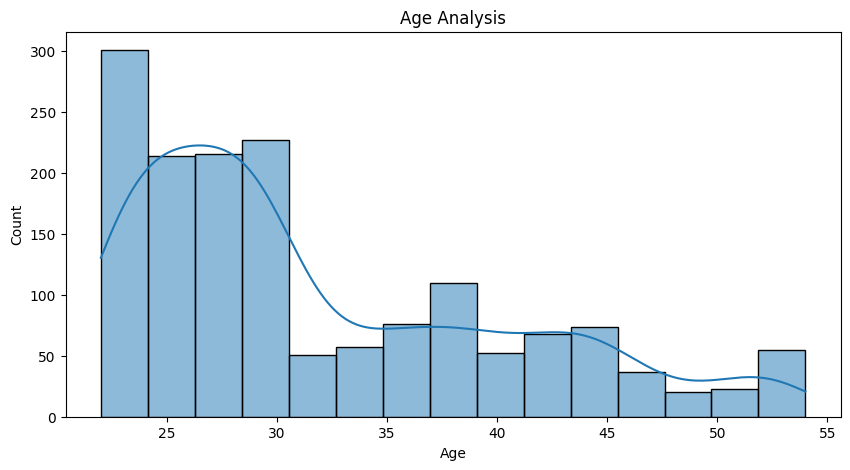

In [80]:
#Age analysis
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',kde=True)
plt.title('Age Analysis')
plt.show()


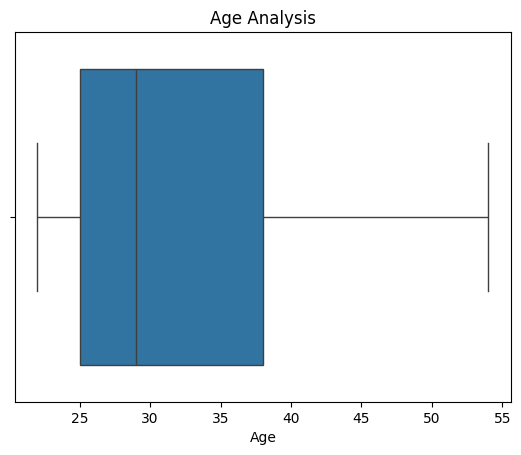

In [ ]:
sns.boxplot(data=df,x='Age')
plt.title('Age Analysis')
plt.show()

* The distribution of age is right skewed which means there are more young people than the old people.
* The median age is 29 years, meaning half of the people in the dataset are below 29 years of age and half are above 29 years of age.
* The age range is not mentioned but according to the boxplot we can estimate the age range between 20 years to 50 years of age.  
* There are no outliers.

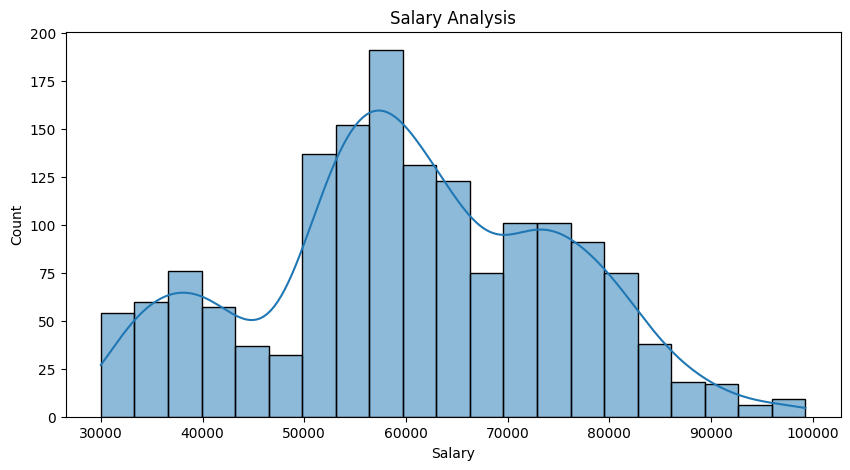

In [ ]:
#Salary analysis
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Salary',kde=True);
plt.title('Salary Analysis')
plt.show()


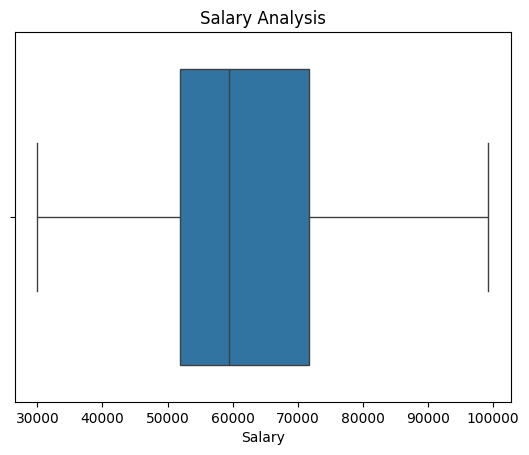

In [ ]:
sns.boxplot(data=df,x='Salary')
plt.title('Salary Analysis')
plt.show()

* The distribution of salary is right skewed meaning there are more individual with lower salary compared to high salary individual.
* The median salary is around 59000.
* There are no outliers.

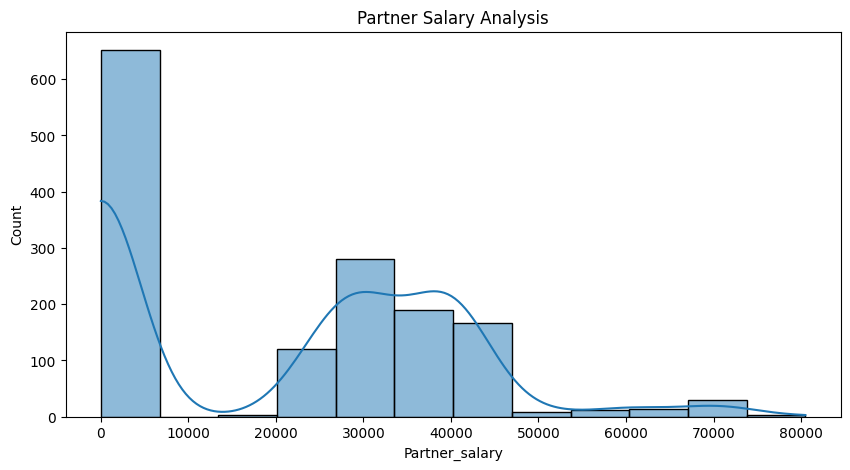

In [ ]:
#Partner salary analysis
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Partner_salary',kde=True);
plt.title('Partner Salary Analysis')
plt.show()

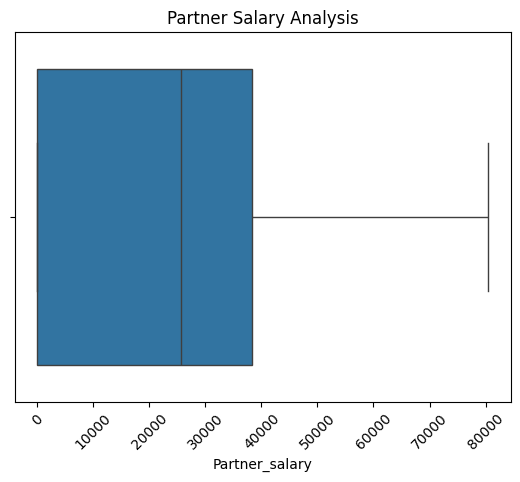

In [ ]:
sns.boxplot(data=df,x='Partner_salary')
plt.title('Partner Salary Analysis')
plt.xticks(rotation=45)
plt.show()

* The distribution of partner salary is right skewed.
* The median partner salary is around 26000
* There are no outliers.

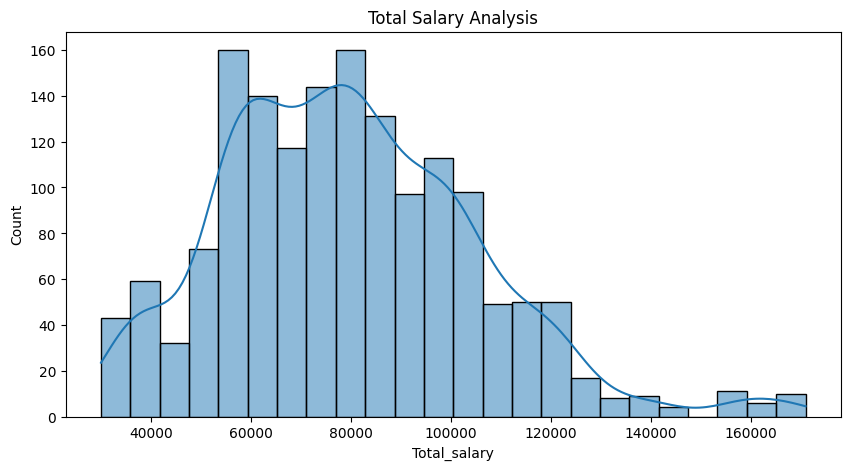

In [ ]:
#Total salary analysis
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Total_salary',kde=True);
plt.title('Total Salary Analysis')
plt.show()

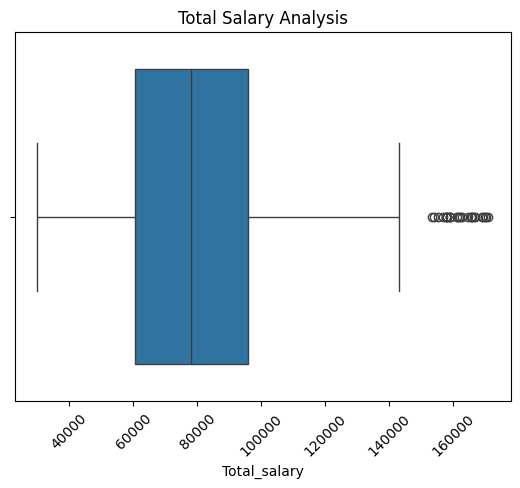

In [ ]:
sns.boxplot(data=df,x='Total_salary')
plt.title('Total Salary Analysis')
plt.xticks(rotation=45)
plt.show()

* The distribution of total salary is right skewed.
* The median total salary is around 78000.
* There are a few outliers indicating people with higher total salary compared to the majority.


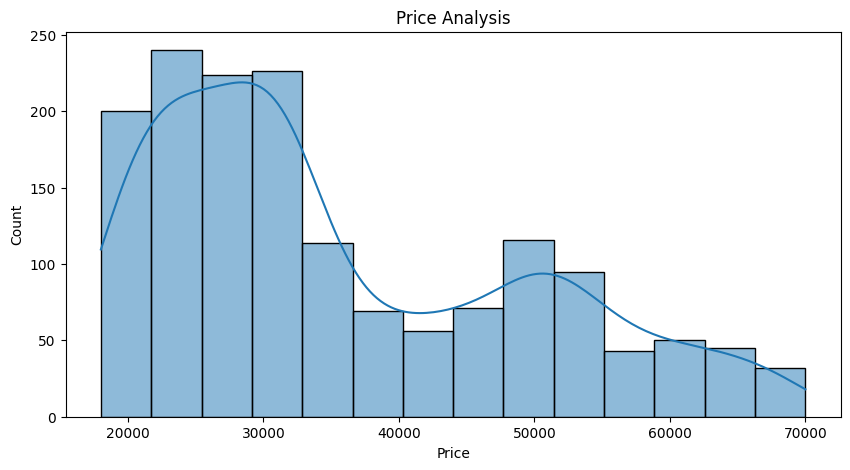

In [ ]:
#Price analysis
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Price',kde=True);
plt.title('Price Analysis')
plt.show()

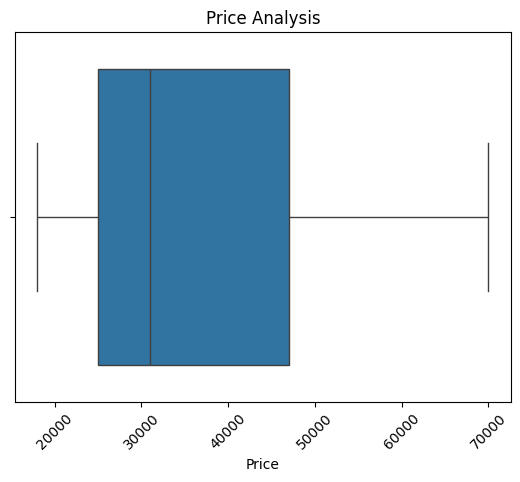

In [ ]:
sns.boxplot(data=df,x='Price')
plt.title('Price Analysis')
plt.xticks(rotation=45)
plt.show()

* The price distribution is right skewed meaning there are more cars with lower prices than the cars with higher prices.
* The median price of the cars is 31000.
* The price range of the car is not mentioned but from the histplot we can estimate the price to range from 25000 to 70000

# **Bivariate Analysis**
- Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

<Figure size 10x10 with 0 Axes>

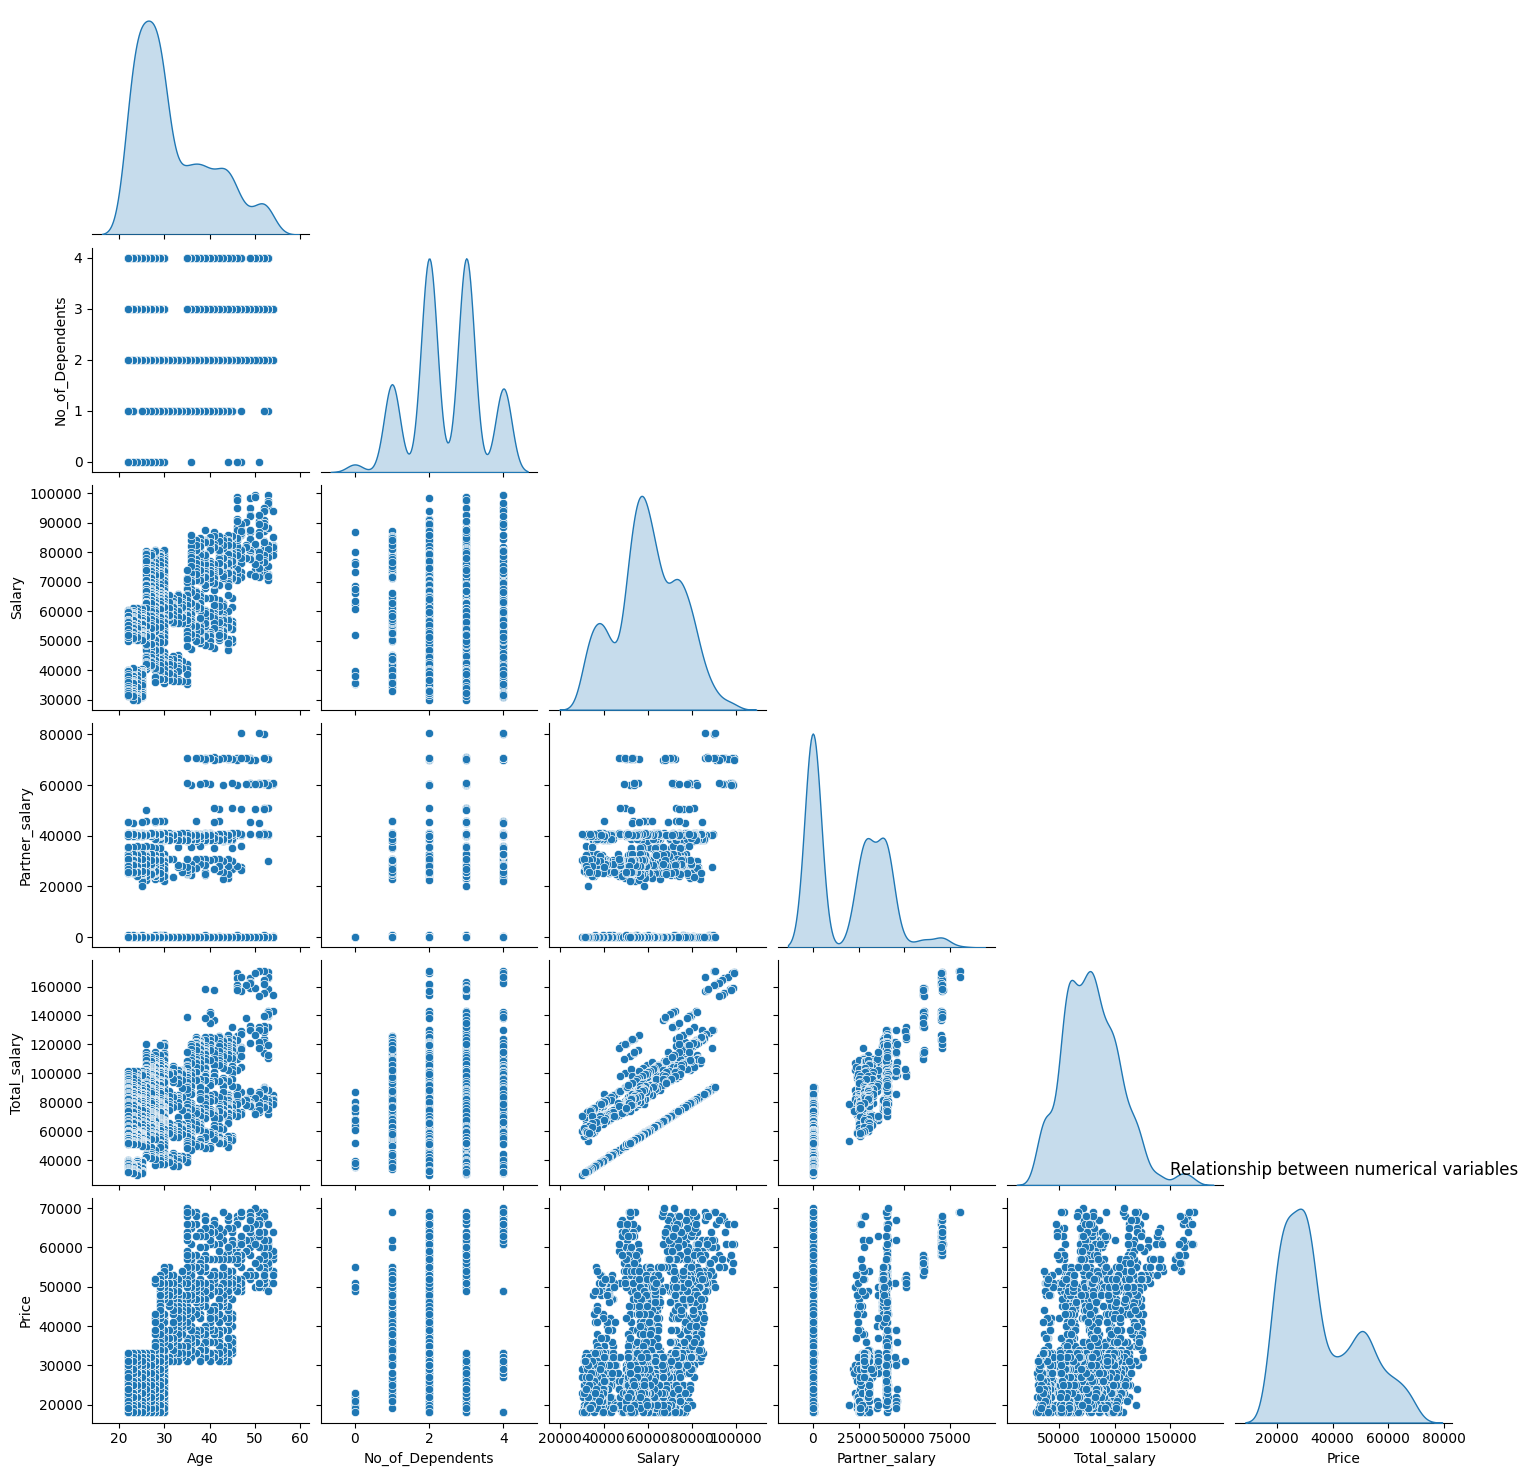

In [88]:
plt.figure(figsize=(0.1,0.1))
sns.pairplot(data=df,diag_kind='kde',corner=True)
plt.title('Relationship between numerical variables')
plt.show()

plt.show()

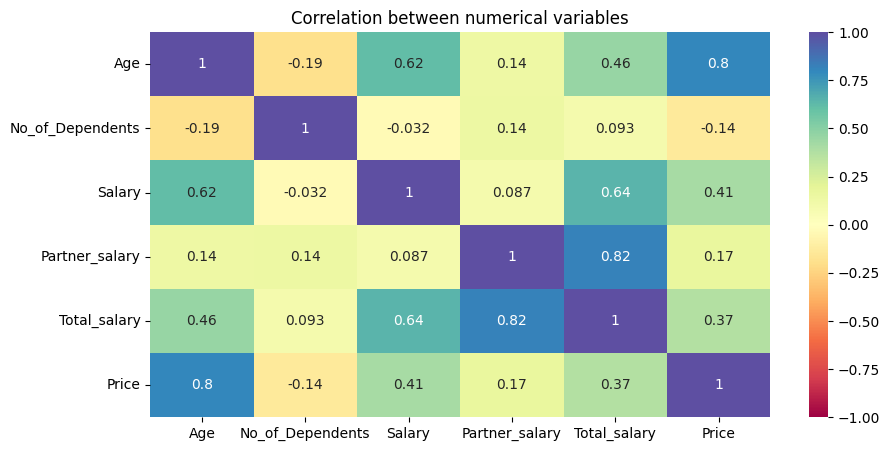

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title('Correlation between numerical variables')
plt.show()


* Age & Price has a strong positive correlation of 0.8 indicating a strong positive relationship suggesting older people buy cars with higher prices.
* Number of dependents & has a correlation of -0.14, indicating a weak negative relationship meaning young people tend to have fewer dependents.
* Salary & Total salary has a correlation of 0.64, indicating a moderate positive relationship meaning that when individual salary increases, the total salary also tends to increase, but not as strongly as the relationship between partner salary and total salary.
* Partner salary & Total salary has a correlation of 0.81, indicating a very strong positive relationship meaning that when partner salary increases, the total salary also tends to increase significantly.


**Relationship between categorical and numerical variables**

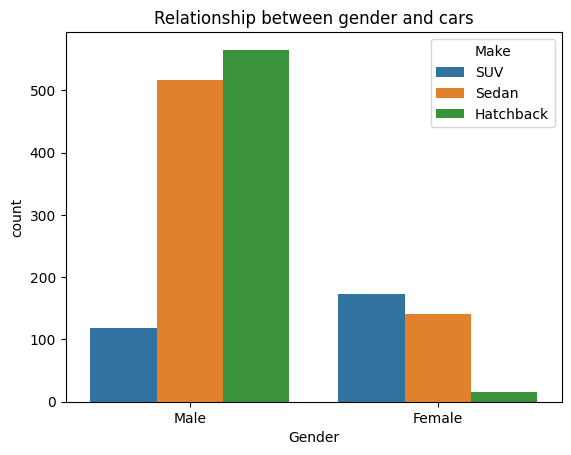

In [ ]:
#Relationship between gender and cars
sns.countplot(data=df,x='Gender',hue='Make')
plt.title('Relationship between gender and cars')
plt.show()

* Hatchbacks are more prefered by men followed by Sedan and SUV.
* SUV's are more prefered by women followed by Sedan and a very little prefer hatchbacks.

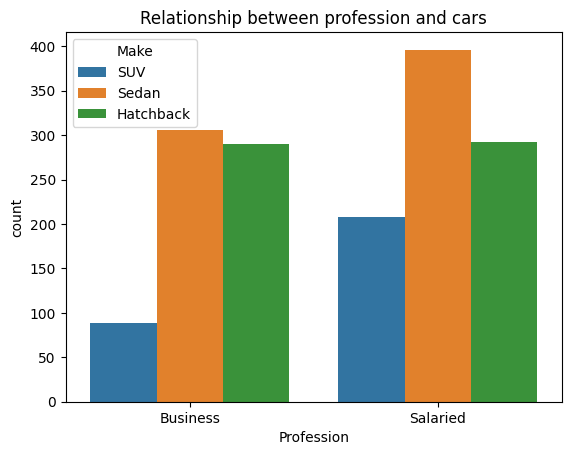

In [ ]:
#Relationship between profession and cars
sns.countplot(data=df,x='Profession',hue='Make')
plt.title('Relationship between profession and cars')
plt.show()

* Individuals who have their own business prefer Sedans which is followed by Hatchbacks and SUV's.
* Salaried individuals prefere Sedans followed by Hatchbacks and Suv's.

In [106]:
#Total salaried people
Total_salaried_people=df[df['Profession']=='Salaried'].shape[0]

#Total salaried people who bought a sedan
salaried_sedan=df[(df['Profession']=='Salaried') & (df['Make']=='Sedan')].shape[0]

#Likelihood of a salaried person buying a sedan
likelihood_salaried_sedan=(salaried_sedan/Total_salaried_people)*100
print('The likelihood of a salaried person buying a sedan is',likelihood_salaried_sedan,'%')

The likelihood of a salaried person buying a sedan is 44.19642857142857 %


* The likelihood of a salaried person buying a sedan is 44.19%



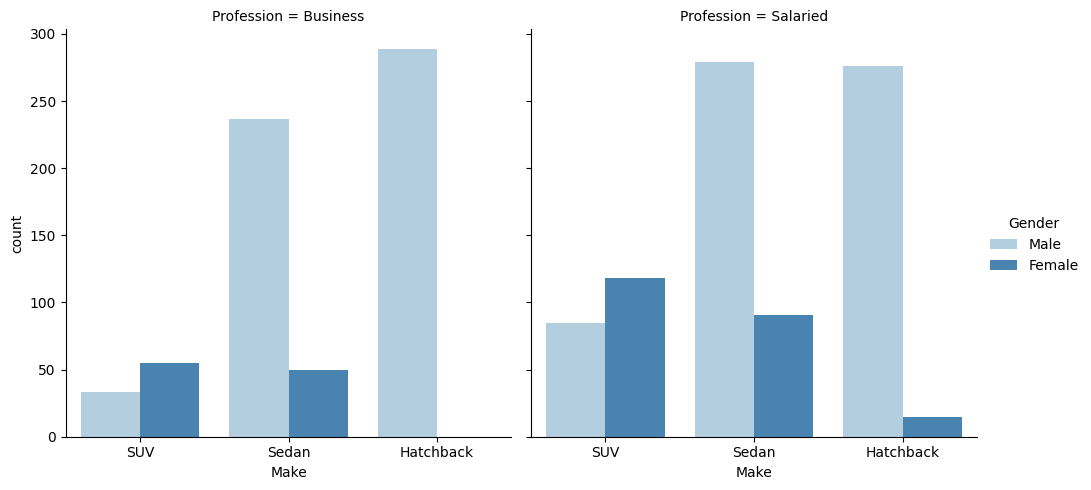

In [90]:
#Car preference Male vs Female according to profession
sns.catplot(data=df,col='Profession',x='Make',hue='Gender',kind='count',palette='Blues')
plt.show()

* Men who have their own business prefer Hatchbacks the most followed by Sedans and SUV's.
* Women who have their own business prefer SUV's followed by Sedans.
* Men who are salaried prefer Hatchback and Sedan's almost the same followed by SUV's.
* Women who are salaried prefer SUV's the most followed by Sedans and very little prefer hatchbacks.

In [ ]:
#Purchasing power analysis based on gender
df.groupby('Gender')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0
Male,1199.0,32817.347790,12299.239195,18000.0,24000.0,29000.0,37500.0,70000.0


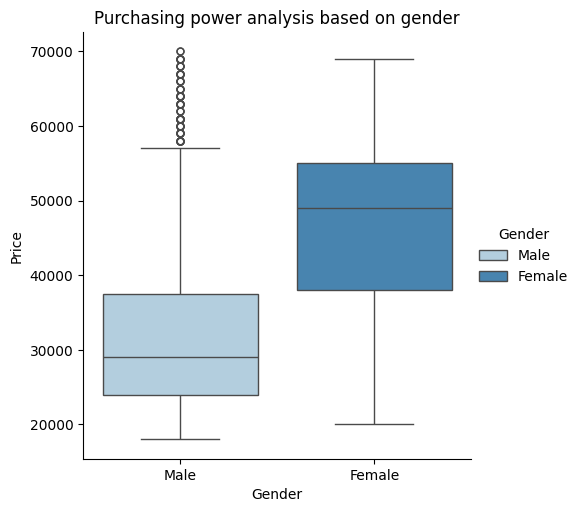

In [91]:
sns.catplot(data=df,x='Gender',y='Price',hue='Gender',kind='box',palette='Blues')
plt.title('Purchasing power analysis based on gender')
plt.show()

* Women tend to purchase automobile more than men and also tend to spend more.
* 75% of the men limit their spending on automobiles to 38000 while women spending on automobiles start at 38000.
* There are outliers observed in Men.

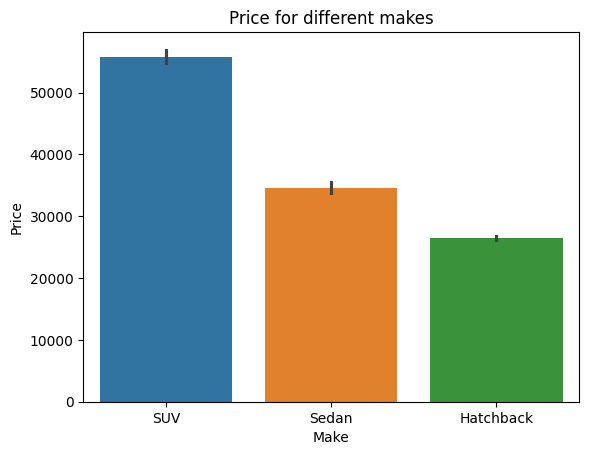

In [93]:
#Price for different makes
sns.barplot(data=df,x='Make',y='Price',hue='Make')
plt.title('Price for different makes')
plt.show()


* SUV's cost more than Sedans and hatchbacks i.e SUV>Sedan>Hatchback

In [97]:
#Data Frame for men and women
df_men=df.loc[df['Gender']=='Male']
df_women=df.loc[df['Gender']=='Female']

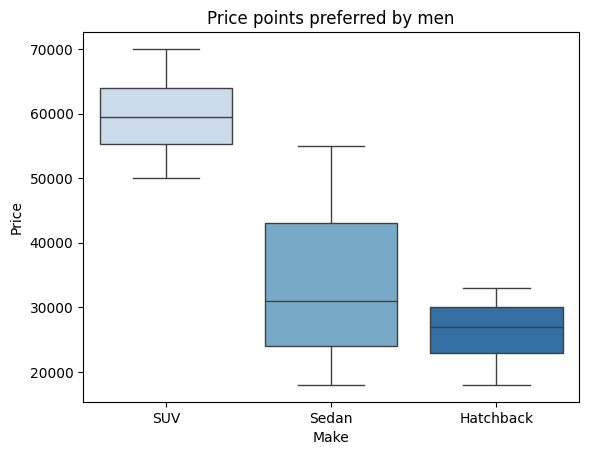

In [98]:
#Pricepoints preferred by men
sns.boxplot(data=df_men,x='Make',y='Price',hue='Make',palette='Blues')
plt.title('Price points preferred by men')
plt.show()

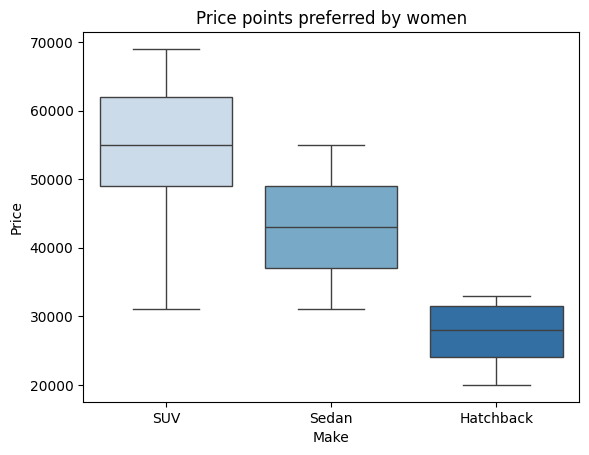

In [101]:
#Pricepoints preferrend by women
sns.boxplot(data=df_women,x='Make',y='Price',hue='Make',palette='Blues')
plt.title('Price points preferred by women')
plt.show()

* Men prefer Hatchback however they also buy Sedans equally but men purchased lower segment sedans with the mean price of 32000
* Women prefer SUV's which are priced high followed by Sedans, where the mean price of SUV's are 55000 and Sedans are 43000.

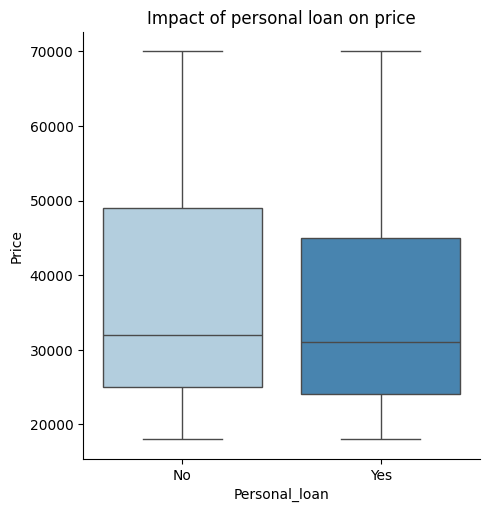

In [102]:
#Analysing the impact of personal loan on price
sns.catplot(data=df,x='Personal_loan',y='Price',hue='Personal_loan',kind='box',palette='Blues')
plt.title('Impact of personal loan on price')
plt.show()

In [ ]:
df.groupby('Personal_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


* The median purchase price with people taking personal loand and not taking personal loan is in between 30000 to 32000.
* There is no much difference in purchasing price whether or not personal loan is taken or not.


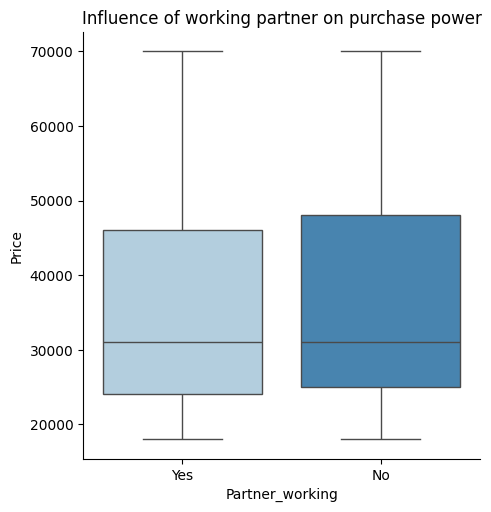

In [105]:
#Influence of working partner on purchase power
sns.catplot(data=df,x='Partner_working',y='Price',hue='Partner_working',kind='box',palette='Blues')
plt.title('Influence of working partner on purchase power')
plt.show()

* No significant difference is seen on the purchasing power whether or not the partner is working or not.

Summary
1. Do men tend to prefer SUVs more compared to women?

* SUVs are typically preferred by women, whereas hatchbacks are preferred by males, who then choose sedans.
* Women should be the primary target of SUV marketing campaigns, and advertising tactics should be modified to suit their tastes.
2. What is the likelihood of a salaried person buying a Sedan?
* Of the salaried population, about 44.19% have bought sedan vehicles.
* Target Sedans' marketing campaigns at salaried people, emphasizing amenities or perks that appeal to them.

3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target
for an SUV sale over a Sedan sale?
* Salaried men may be more interested in sedans than SUVs.
* To increase SUV sales, think about focusing on salaried men with incentives or campaigns designed especially for them.
4. How does the amount spent on purchasing automobiles vary by gender?
* Compared to men, women typically spend more money on cars.
*To capitalize on women's desire to spend, businesses can provide a wide variety of car options, such as SUVs and upper category sedans.
5. How much money was spent on purchasing automobiles by individuals who took a personal
loan?
* Those who purchased cars with personal loans typically spent up to INR 45,000.
* Provide loan or financing options that are suited to consumers' spending patterns, sometimes with discounts or incentives for loan applicants.
6. How does having a working partner influence the purchase of higher-priced cars?
* The presence or absence of a working partner does not significantly alter the purchasing habits of the couple.

* Maintain your marketing of more expensive cars to both client groupings, but think about modifying your approach depending on additional variables like gender or occupation.

In order to optimize product offerings, target particular demographics, and customize marketing campaigns, these insights and suggestions are meant to serve as a guide for company strategies that seek to increase consumer happiness and revenues.